In [1]:
import pandas as pd
pandas.__version__

NameError: name 'pandas' is not defined

In [2]:
 import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
tr = pd.read_csv(r"C:\data_folder\trends.csv")

In [5]:
tr.head()
#This is what the csv file looks like. I made some assumptions to clean the data further

,Name,Sex,Race,Booking_Date,Release_Date,Status,Bond_Amount,Bond_Date,Charge,Court,File_Number,Statute
0,COLETTA M BATES,F,Black,2019-09-12,2019-09-12,RELEASED,10000.0,None,MEDICAID FRAUD,19TH JDC,57-00002804,15:10.1
1,TONYA M SKINNER,F,Black,2019-09-12,2019-09-12,RELEASED,10000.0,None,MEDICAID FRAUD,19TH JDC,57-00002804,15:10.1
2,FRANCHESTA WHEELER,F,Black,2019-09-12,2019-09-12,RELEASED,10000.0,None,MEDICAID FRAUD,19TH JDC,57-00002804,15:10.1
3,ROSALYN M BLOCKER,F,Black,2019-09-12,2019-09-12,RELEASED,4000.0,None,MEDICAID FRAUD,19TH JDC,57-00002804,15:10.1
4,DELILAH ANDERSON MARTIN,F,Black,2019-09-23,2019-09-23,RELEASED,20000.0,None,MEDICAID FRAUD,19TH JDC,57-00002733,15:10.1


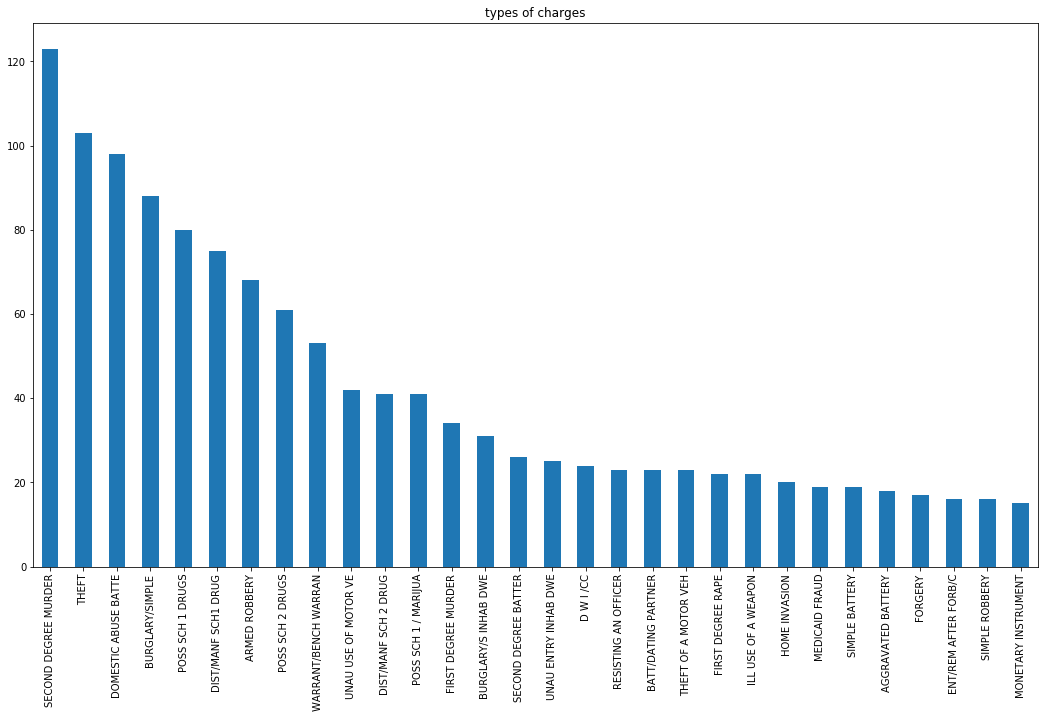

In [56]:
actual = tr.drop_duplicates(subset=["Name"])
actual.shape
actual['Charge'].value_counts()[:30].plot(kind="bar",title="types of charges",figsize=(18,10))

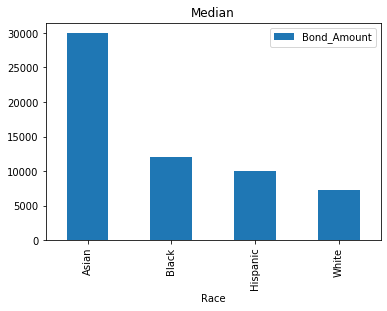

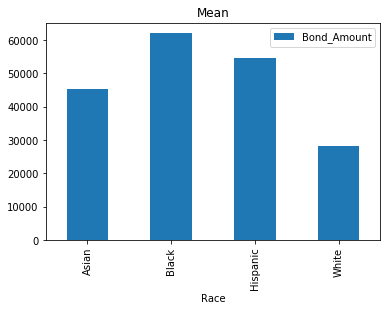

In [6]:
actual.groupby(['Race']).median().plot(kind='bar',title="Median")
actual.groupby(['Race']).mean().plot(kind='bar',title="Mean")
#Median and Mean bond amount. It seems that Asians are off the charts on this graph; but they are outliers only 
#because there's only a few of them.

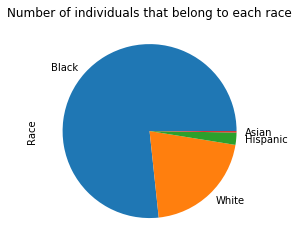

In [7]:
actual['Race'].value_counts().plot(kind='pie',title="Number of individuals that belong to each race")


In [33]:
array = ['SECOND DEGREE MURDER','FIRST DEGREE MURDER','FIRST DEGREE RAPE','SECOND DEGREE KIDNAP','SECOND DEGREE BATTER','SECOND DEGREE ROBBER','SECOND DEGREE RAPE/F']
serious = tr.drop_duplicates(subset=["Name"]).loc[tr['Charge'].isin(array)]
serious.shape

(226, 12)

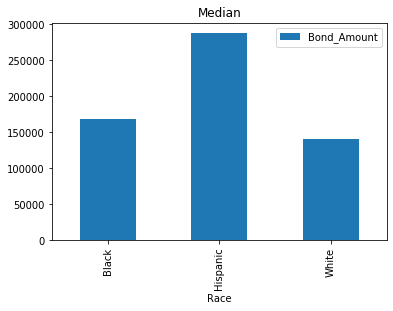

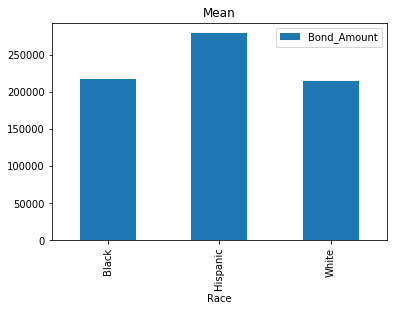

In [32]:
serious.groupby(['Race']).median().plot(kind='bar',title="Median")
serious.groupby(['Race']).mean().plot(kind='bar',title="Mean")
# I classfied the crimes on the list according to http://www.lsp.org/socpr/offenses.html.
# These are crimes listed as the tier three offenses, which are: All offenses defined in 15:541(2) as an "aggravated offense"
# will have a lifetime registration period conducted quarterly. 
# Also took a look at https://nola.gov/nopd/documents/ucrclassifyingcrimespowerpoint/

# Hispanics are the outliers in this case due to their sample size.
# Otherwise, the two major entires in this data, black and white individuals, pay about the same amount of bond.

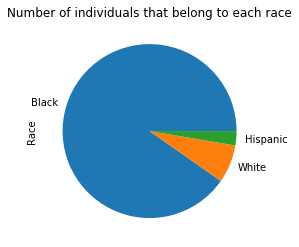

In [9]:
serious['Race'].value_counts().plot(kind='pie',title="Number of individuals that belong to each race")

In [63]:
array2 = ['POSS SCH 1 / MARIJUA','DIST/MANF SCH1 DRUG','DIST/MANF SCH1 DRUG','POSS SCH 1 DRUGS','POSS SCH 2 DRUGS','DIST/MANF SCH 2 DRUG']
minor =  actual.loc[actual['Charge'].isin(array2)]
minor.shape


(298, 12)

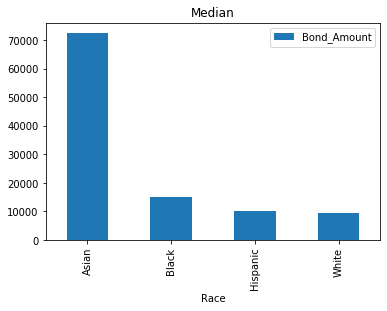

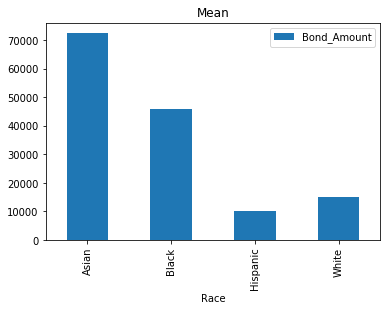

In [74]:
minor.groupby(['Race']).median().plot(kind='bar',title="Median")
minor.groupby(['Race']).mean().plot(kind='bar',title="Mean")
# I took a look the list of crimes that are related to drugs.
# Surprisingly, white individuals are exposed to bond amounts much more than the amount required  by black individuals.
# This makes me believe that there has to be specific criterion of crimes that black individuals pay more bonds for.

# This also hints at the further inconsitencies that bond amounts entail...

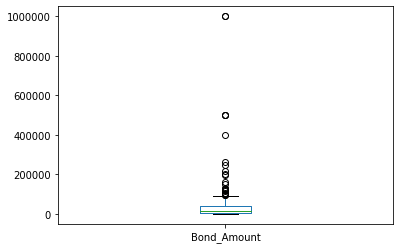

In [77]:
minor.loc[minor['Race']=='Black'].plot.box()

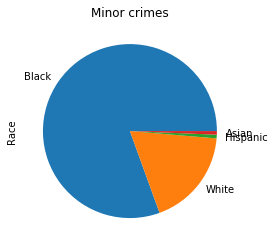

In [65]:
minor['Race'].value_counts().plot(kind='pie',title="Minor crimes")

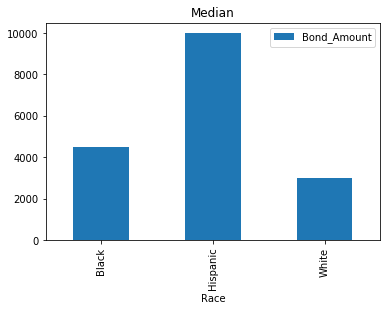

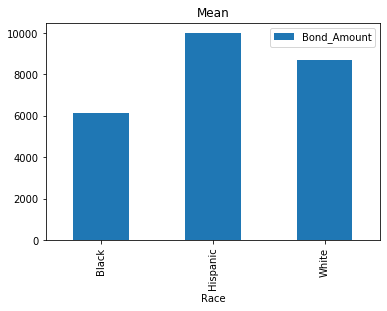

In [71]:
array3 = ['THEFT','BULGLARY/SIMPLE']
thief =  actual.loc[actual['Charge'].isin(array3)]
thief.shape

thief.groupby(['Race']).median().plot(kind='bar',title="Median")
thief.groupby(['Race']).mean().plot(kind='bar',title="Mean")

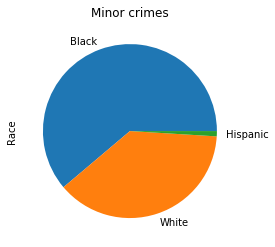

In [72]:
thief['Race'].value_counts().plot(kind='pie',title="Minor crimes")

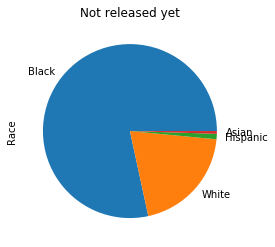

In [68]:
nopay = actual.loc[actual['Release_Date']=="None"]
nopay.loc[nopay['Charge'].isin(array2)]['Race'].value_counts().plot(kind='pie',title="Not released yet")